波士顿房价的数据集被scikit-learn删掉了，我们得去找一下：http://t.cn/RfHTAgY

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 一、基于线性回归模型的波士顿房价预测

波士顿房价预测数据集介绍

![波士顿房价数据集特征介绍](图片1.png)

## 1、加载数据集

In [20]:
dataset_file_path = '../dataset/housing_data.txt'

In [33]:
with open(dataset_file_path, 'r') as f:
    # 读出来
    lst = f.readlines()
    # 删掉每行开头的空格
    lst = [x.lstrip() for x in lst]
    # 统一间隔
    lst = [x.replace('  ', ' ') for x in lst]
    lst = [x.replace('   ', ' ') for x in lst]
    lst = [x.replace('  ', ' ') for x in lst]
    lst = [x.replace(' ', ',') for x in lst]

with open('boston.csv', 'w') as f:
    # 写进去
    f.writelines(lst)

In [34]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('boston.csv', names=names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


共有506行数据，13个特征和1个标签

In [35]:
boston.shape

(506, 14)

In [37]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 2、划分数据集

In [39]:
from sklearn.model_selection import train_test_split

In [53]:
data = boston.iloc[:, :-1]
target = boston.iloc[:, -1]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=56)

## 3、训练模型

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linear = LinearRegression()

In [57]:
linear.fit(X_train, y_train)

LinearRegression()

## 4、模型预测

In [59]:
y_pred = linear.predict(X_test)
y_pred

array([12.72929035, 22.59602841, 22.61838723, 15.94602893, 35.14453438,
       12.52848844, 27.77459984, 29.26912495, 13.98937037, 34.32319353,
       24.94812302, 29.18097743, 24.77997646, 22.34888582, 20.66192337,
       17.31121284, 31.68187899, 19.9693454 ,  6.57143257, 22.35353247,
       33.73467369, 25.37347222, 33.47187892, 36.40433653, 18.94861335,
       20.34808193, 24.33858498, 25.18751338, 24.61027369, 16.90565538,
       13.4628115 , 19.42876132, 20.44973494, 13.66729435, 19.78737844,
       28.80489732, 19.97913775, 31.0504922 , 12.43140316, 22.26121515,
       24.78229667, 24.7471741 , 20.275528  ,  6.00240789, 28.75819826,
       22.93594504, 26.99225683, 33.31640859, 24.11181861, 19.01594158,
       19.42874606, 20.98783106, 27.50496515, 29.14639717, 35.36436375,
       18.12153781])

## 5、模型评估

In [60]:
# 决定系数
linear.score(X_test, y_test)

0.4643542842186501

In [76]:
# 线性回归模型的权重
w = linear.coef_

In [77]:
# 线性回归模型的截取
b = linear.intercept_

In [84]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

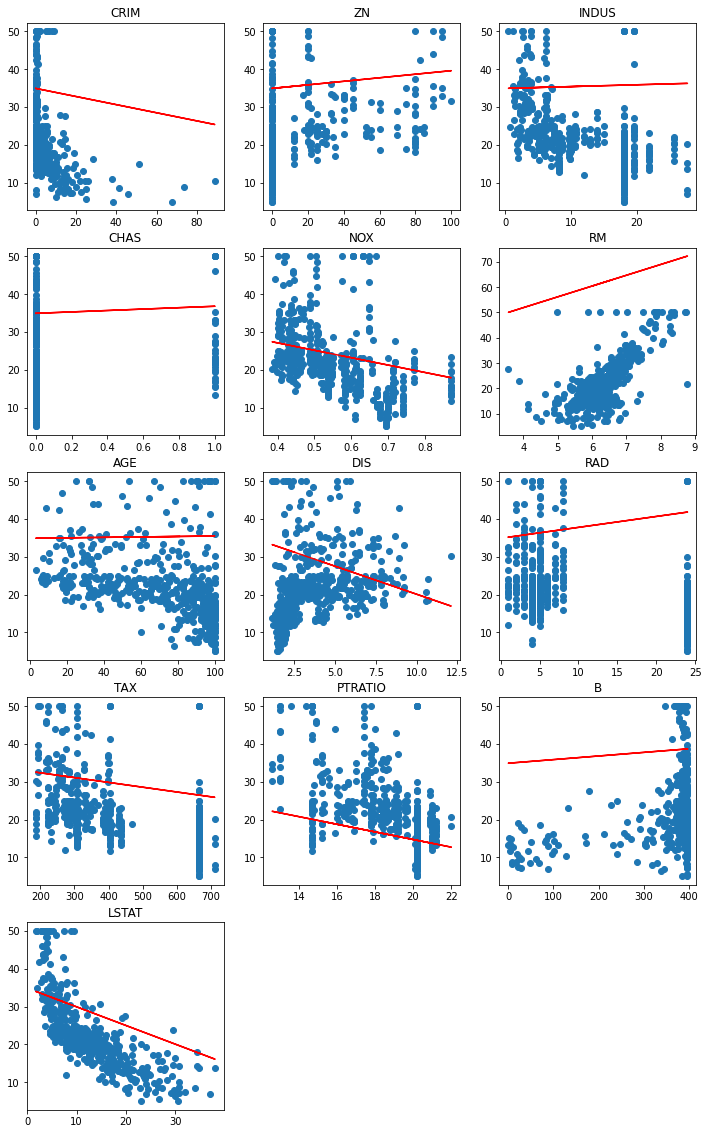

In [89]:
# 画出线性回归可视化预测图像
plt.figure(figsize=(4*3, 4*5))
for i, col in enumerate(data.columns):
    x = data[col].values
    y = target.values

    axes = plt.subplot(5, 3, i+1)
    axes.scatter(x=x, y=y)
    axes.plot(x, w[i]*x+b, c='r')
    axes.set_title(col)